# Regression Model for Real Estate Price Prediction


# 1) Data Importing and Pre-processing

## 1.1) Importing Libraries

Importing the necessary libraries to read the dataset

In [46]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.2) Importing Dataset

Importing the dataset from the csv file and storing it in a dataframe

In [47]:
# Import the complete redfin dataset
df = pd.io.parsers.read_csv("./redfin_2022_san_diego-all.csv", dtype={'ZIP OR POSTAL CODE': 'str'})

## 1.3) Initial Data Summary

Review data field attributes and data types

In [48]:
# View a snapshot of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    300 non-null    object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                300 non-null    object 
 3   ADDRESS                                                                                      297 non-null    object 
 4   CITY                                                                                         300 non-null    object 
 5   STATE OR PROVINCE                   

In [49]:
# Display the first 5 rows of the dataset
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,3330 Caminito Eastbluff #149,La Jolla,CA,92037,1150000,3.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/3330-Camini...,SDMLS,220022531,N,Y,32.858687,-117.231625
1,MLS Listing,NaN,Single Family Residential,5640 Dugan Ave,La Mesa,CA,91942,759000,3.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Mesa/5640-Dugan-A...,SDMLS,220021439,N,Y,32.780982,-117.020159
2,MLS Listing,NaN,Townhouse,3422 Via Alicante,La Jolla,CA,92037,829900,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/3422-Via-Al...,SDMLS,220020482,N,Y,32.861255,-117.231921
3,MLS Listing,NaN,Condo/Co-op,8437 Via Mallorca #85,La Jolla,CA,92037,875000,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/8437-Via-Ma...,SDMLS,220020168,N,Y,32.859532,-117.233455
4,MLS Listing,NaN,Single Family Residential,11393 Turtleback Ln,San Diego,CA,92127,1195000,4.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/CA/San-Diego/11393-Turt...,SDMLS,220019616,N,Y,33.009474,-117.083660


Checking for missing values

In [50]:
# Brief Data Snapshot before cleaning data to check for missing values
print("Missing Values Present:", df.isnull().values.any())
print("Sum of missing values: ", df.isnull().sum().sum())
print("Columns with NA: ", df.columns[df.isna().any()].tolist())

Missing Values Present: True
Sum of missing values:  1118
Columns with NA:  ['SOLD DATE', 'ADDRESS', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME']


## 1.4) Data Cleaning

Cleaning the data by removing unnecessary columns and replacing missing values

In [51]:
# Drop the data columns that are not relevant and display the snapshot of the new dataframe
df_mod = df.drop(['SALE TYPE', 'CITY', 'STATUS', 'STATE OR PROVINCE', 'SOLD DATE', 'ADDRESS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'], axis=1)

# Fill NA values of "DAYS ON MARKET" with 0
df_mod["DAYS ON MARKET"].fillna(0, inplace = True)

# Drop Rows where "Property Type" is "Vacant Land"
vacant_land = df_mod[df_mod['PROPERTY TYPE'] == 'Vacant Land'].index
df_mod.drop(vacant_land, inplace = True)

# Fill NA values of "HOA" with "0"
df_mod["HOA/MONTH"].fillna(0, inplace=True)

# Fill NA "Lot Size" with Mean Value
df_mod["LOT SIZE"].fillna(df_mod['LOT SIZE'].mean(), inplace=True)
# df_mod["LOT SIZE"].fillna(df_mod['LOT SIZE'].median(), inplace=True) # Use median instead of mean to avoid outliers

# Fill NA "Year Built" with Mean Value
df_mod["YEAR BUILT"].fillna(df_mod['YEAR BUILT'].mean(), inplace=True)
# df_mod["YEAR BUILT"].fillna(df_mod['YEAR BUILT'].median(), inplace=True) # Use median instead of mean to avoid outliers

# # Remove outlier largest $/SQUARE FEET
outlier = df_mod[df_mod['$/SQUARE FEET'].max() == df_mod['$/SQUARE FEET']].index
df_mod.drop(outlier, inplace = True)

# # Remove outlier largest "SQUARE FEET" value
# outlier = df_mod[df_mod['$/SQUARE FEET'].max() == df_mod['$/SQUARE FEET']].index
# df_mod.drop(outlier, inplace = True)

In [52]:
# Check for missing values after cleaning data
print("Missing Values Present:", df_mod.isnull().values.any())
print("Sum of missing values: ", df_mod.isnull().sum().sum())
print("Columns with NA: ", df_mod.columns[df_mod.isna().any()].tolist())


Missing Values Present: False
Sum of missing values:  0
Columns with NA:  []


# 2) Statistical Analysis and Visualization

## 2.1) Final Dataframe Information

In [53]:
# Display the info and datatypes for the new dataframe
df_mod.info()
df_mod.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 299
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROPERTY TYPE       289 non-null    object 
 1   ZIP OR POSTAL CODE  289 non-null    object 
 2   PRICE               289 non-null    int64  
 3   BEDS                289 non-null    float64
 4   BATHS               289 non-null    float64
 5   LOCATION            289 non-null    object 
 6   SQUARE FEET         289 non-null    float64
 7   LOT SIZE            289 non-null    float64
 8   YEAR BUILT          289 non-null    float64
 9   DAYS ON MARKET      289 non-null    float64
 10  $/SQUARE FEET       289 non-null    float64
 11  HOA/MONTH           289 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 29.4+ KB


,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
0,Condo/Co-op,92037,1150000,3.0,2.5,La Jolla,1707.0,155945.000000,1978.0,13.0,674.0,495.0
1,Single Family Residential,91942,759000,3.0,2.0,La Mesa,1018.0,6100.000000,1958.0,27.0,746.0,0.0
2,Townhouse,92037,829900,2.0,2.5,La Jolla,1140.0,51774.889474,1975.0,40.0,728.0,509.0
3,Condo/Co-op,92037,875000,2.0,2.5,La Jolla,1074.0,103585.000000,1977.0,42.0,815.0,400.0
4,Single Family Residential,92127,1195000,4.0,3.0,Rancho Bernardo,2284.0,10259.000000,1981.0,48.0,523.0,107.0


## 2.2) Dataframe Description

Descriptive statistics of the dataframe

In [54]:
df_mod.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
count,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,2.994084e+06,3.536332,3.193772,2792.961938,51749.051721,1984.570837,54.602076,969.352941,257.456747
std,3.949093e+06,1.556649,1.836785,2403.184904,81325.887573,22.996512,86.765793,544.302414,374.975118
min,3.690000e+05,0.000000,1.000000,432.000000,504.000000,1920.000000,0.000000,382.000000,0.000000
25%,8.399000e+05,2.000000,2.000000,1280.000000,10259.000000,1969.000000,15.000000,611.000000,0.000000
50%,1.650000e+06,4.000000,2.500000,2012.000000,51774.889474,1984.493007,34.000000,807.000000,158.000000
75%,3.495000e+06,4.000000,4.000000,3598.000000,51774.889474,2005.000000,67.000000,1149.000000,405.000000
max,2.800000e+07,10.000000,12.500000,22897.000000,872630.000000,2022.000000,982.000000,4458.000000,3353.000000


## 2.3) Dataframe Visualization (General)

Visualizing the dataframe using histograms

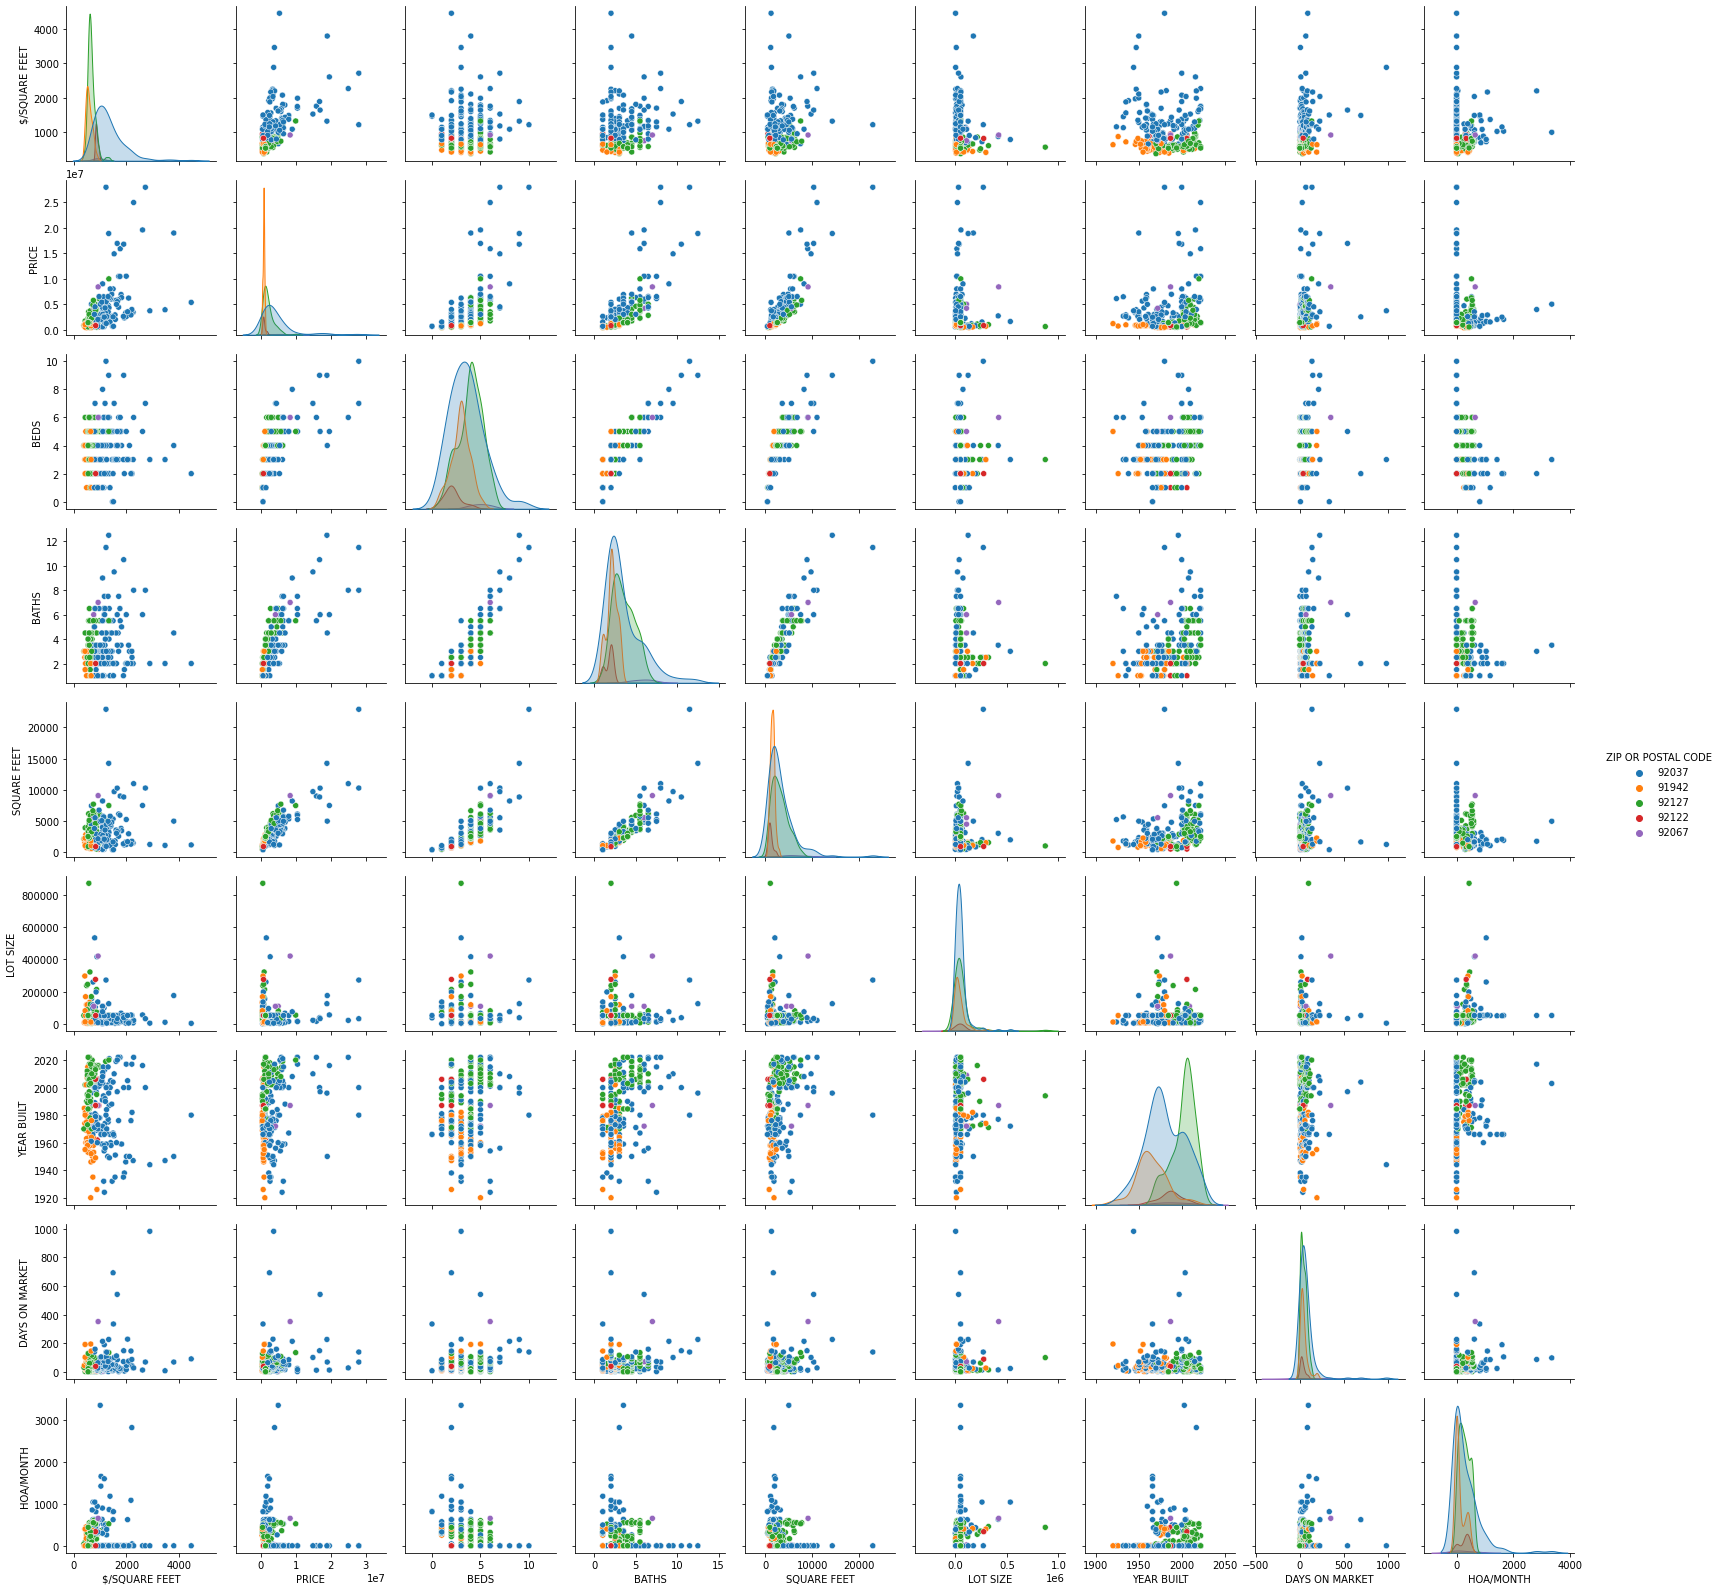

In [55]:
sns.pairplot(df_mod, vars=['$/SQUARE FEET',	'PRICE',	'BEDS',	'BATHS', 'SQUARE FEET',	'LOT SIZE',	'YEAR BUILT',	'DAYS ON MARKET',	'HOA/MONTH'], hue="ZIP OR POSTAL CODE")

## 2.4) Dataframe Insights

Grouping Dataframe by Neighborhood/Zipcode and calculating the mean of each column sorted by '$/SQUARE FEET'

In [56]:
# Group the dataframe by the "Zip or Postal Code" and display the mean of each group
df_group_mean = df_mod.groupby(["ZIP OR POSTAL CODE"]).mean().sort_values(by=['$/SQUARE FEET'], ascending=False)
df_group_mean

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
ZIP OR POSTAL CODE,,,,,,,,,
92037,4.431943e+06,3.557971,3.431159,3170.775362,49492.554157,1980.173913,67.956522,1315.739130,300.333333
92067,5.865633e+06,5.000000,5.833333,6387.333333,213008.000000,1989.333333,142.333333,928.666667,225.666667
92122,8.821800e+05,2.100000,1.700000,1029.800000,65323.533684,1986.700000,28.600000,866.400000,255.200000
92127,2.100093e+06,3.933333,3.500000,3015.555556,55312.116257,2001.610800,41.733333,662.244444,271.300000
91942,7.969829e+05,2.937500,2.083333,1432.062500,38649.034868,1964.520833,40.270833,573.312500,110.687500


Grouping Dataframe by Neighborhood/Zipcode and calculating the standard deviation of each column

In [57]:
# Group the dataframe by the "Zip or Postal Code" and display the std of each group
df_group_std = df_mod.groupby(["ZIP OR POSTAL CODE"]).std()
df_group_std


,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
ZIP OR POSTAL CODE,,,,,,,,,
91942,2.198430e+05,0.954413,0.638593,462.617548,53704.530936,18.023613,42.816153,113.868935,168.866579
92037,5.118862e+06,1.816462,2.228049,2958.914696,67955.303555,22.652859,115.589121,604.525782,499.535629
92067,2.229955e+06,1.000000,1.258306,2396.137378,179943.755871,18.610033,183.522024,174.046929,371.948025
92122,4.071730e+05,0.875595,0.483046,496.359592,76216.913336,13.342080,26.239072,47.006383,180.168933
92127,1.606473e+06,1.234340,1.291720,1699.853121,102201.176765,13.504617,33.313560,145.411103,186.364416


Group the data by Neighborhood/Zipcode and describe the data for each zipcode

In [58]:
# Group data by ZIP Code and display descriptive statistics for each the "$/SQUARE FEET" column for each zip code
df_mod_zip = df_mod.groupby('ZIP OR POSTAL CODE').describe()
df_mod_zip["$/SQUARE FEET"].sort_values(by=['min'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
ZIP OR POSTAL CODE,,,,,,,,
92122,10.0,866.400000,47.006383,824.0,828.75,847.5,889.50,953.0
92067,3.0,928.666667,174.046929,757.0,840.50,924.0,1014.50,1105.0
92037,138.0,1315.739130,604.525782,634.0,887.00,1154.5,1520.75,4458.0
91942,48.0,573.312500,113.868935,399.0,485.75,546.0,653.50,879.0
92127,90.0,662.244444,145.411103,382.0,579.50,626.0,719.00,1331.0


## 2.5) Dataframe Visualization (Grouped)

Boxplot of the grouped dataframe by Neighborhood/Zipcode.
From the boxplot we can see that the Zipcode 92037 has the widest spread in price per square foot.

Text(0.5, 1.0, 'Boxplot of $/SQUARE FEET by ZIP Code')

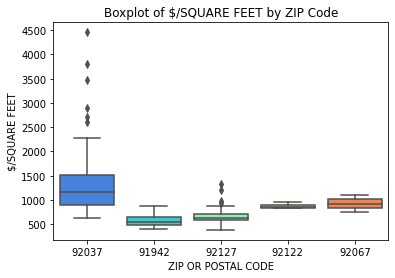

In [59]:
sns.boxplot(x='ZIP OR POSTAL CODE', y='$/SQUARE FEET', data=df_mod, palette='rainbow').set_title("Boxplot of $/SQUARE FEET by ZIP Code")

Scatterplot of the grouped dataframe by Neighborhood/Zipcode

Text(0.5, 1.0, 'Scatterplot of $/SQUARE FEET by ZIP Code')

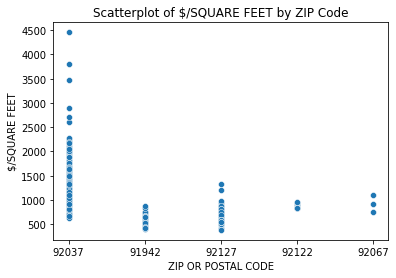

In [60]:
# Scatter Plot of "Zip or Postal Code" vs "$/Square Feet" to show the distribution of the data
sns.scatterplot(x='ZIP OR POSTAL CODE', y='$/SQUARE FEET', data=df_mod).set_title("Scatterplot of $/SQUARE FEET by ZIP Code")

## 2.6) Convert Categorical Data to Numerical Data

Using One Hot Encoding to convert categorical data to numerical data

In [61]:
# Adjust Dataframe for Linear Regression Analysis
df_model = pd.get_dummies(df_mod, columns=['ZIP OR POSTAL CODE']) # Convert categorical data to dummy variables
df_model = pd.get_dummies(df_model, columns=['LOCATION']) # Convert categorical data to dummy variables
df_model = pd.get_dummies(df_model, columns=['PROPERTY TYPE']) # Convert categorical data to dummy variables

## 2.7) Setting the Independent and Dependent Variables

Set the independent variables (X) and dependent variable (y)

In [62]:
X=df_model.drop("$/SQUARE FEET", axis=1) # Drop the target variable from the dataframe
y=df_model["$/SQUARE FEET"] # Set the target variable as the y variable

Display the Independent and Dependent Variables

In [63]:
# Display the independent variables for the model (X)
print("Number of Independent Variables: ", len(df_model.columns))
print("Independent Variables: ", df_model.columns.values)

Number of Independent Variables:  33
Independent Variables:  ['PRICE' 'BEDS' 'BATHS' 'SQUARE FEET' 'LOT SIZE' 'YEAR BUILT'
 'DAYS ON MARKET' '$/SQUARE FEET' 'HOA/MONTH' 'ZIP OR POSTAL CODE_91942'
 'ZIP OR POSTAL CODE_92037' 'ZIP OR POSTAL CODE_92067'
 'ZIP OR POSTAL CODE_92122' 'ZIP OR POSTAL CODE_92127'
 'LOCATION_91942 - La Mesa' 'LOCATION_92037 - La Jolla'
 'LOCATION_92067 - Rancho Santa Fe' 'LOCATION_92115 - San Diego'
 'LOCATION_92122 - University City' 'LOCATION_92127 - Rancho Bernardo'
 'LOCATION_92128 - Rancho Bernardo' 'LOCATION_Avion' 'LOCATION_La Jolla'
 'LOCATION_La Mesa' 'LOCATION_Rancho Bernardo' 'LOCATION_Rancho Santa Fe'
 'LOCATION_San Diego' 'LOCATION_Santaluz' 'LOCATION_University City'
 'PROPERTY TYPE_Condo/Co-op' 'PROPERTY TYPE_Multi-Family (2-4 Unit)'
 'PROPERTY TYPE_Single Family Residential' 'PROPERTY TYPE_Townhouse']


In [64]:
# Display the dependent variable for the model (y)
print("Dependent Variable: ", df_model['$/SQUARE FEET'].name)

Dependent Variable:  $/SQUARE FEET


Display the shape of the Independent and Dependent Variables

In [65]:
# Display the shape of the independent variables (X)
print("Shape of X: ", X.shape)

# Display the shape of the dependent variable (y)
print("Shape of y: ", y.shape)

Shape of X:  (289, 32)
Shape of y:  (289,)


## 2.8 Dataframe Visualization (Correlation)

Probability Density Function (PDF) of the Independent Variables

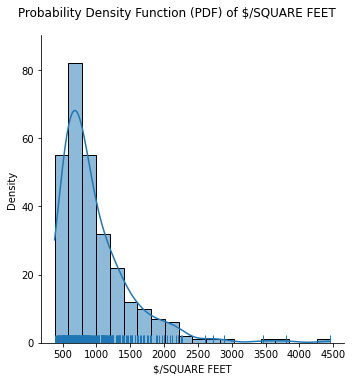

In [66]:
# Probability Density Function (PDF) of to show the distribution of the data
sns.displot(y, kde=True, rug=True, bins=20).set(xlabel='$/SQUARE FEET', ylabel='Density').fig.suptitle('Probability Density Function (PDF) of $/SQUARE FEET').set_position([.5, 1.05])
plt.show()

Q-Q Plot of the Independent Variables. The goodness of fit is determined by the closeness of the points to the line and currently displays a normal fit.

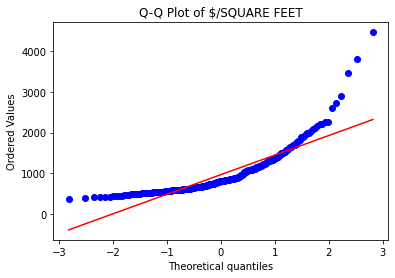

In [67]:
import scipy.stats as stats
# Q-Q plot to show the distribution of the data
stats.probplot(y, dist="norm", plot=plt)
plt.title("Q-Q Plot of $/SQUARE FEET")
plt.show()

Correlation Matrix of the Independent Variables and Dependent Variable

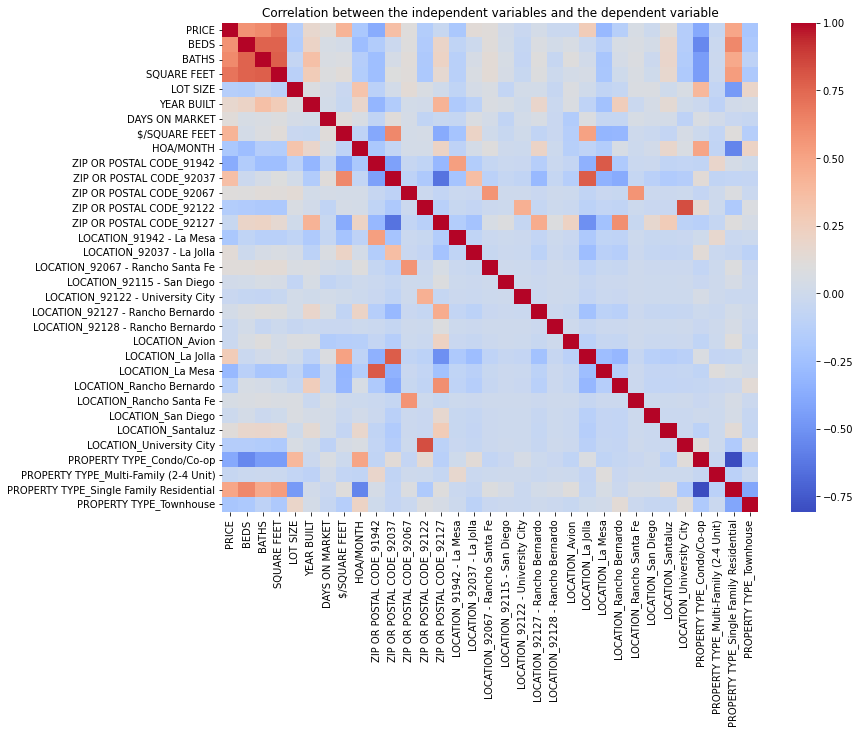

In [68]:
# Correlation between the independent variables and the dependent variable
corrmat = df_model.corr()
corrmat = df_model.corr(method='kendall') # Kendall Correlation
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, cmap='coolwarm')
plt.title("Correlation between the independent variables and the dependent variable")
plt.show()

Snapshot of the dataframe after preparation

In [69]:
# Display the new dataframe with dummy variables
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 299
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PRICE                                    289 non-null    int64  
 1   BEDS                                     289 non-null    float64
 2   BATHS                                    289 non-null    float64
 3   SQUARE FEET                              289 non-null    float64
 4   LOT SIZE                                 289 non-null    float64
 5   YEAR BUILT                               289 non-null    float64
 6   DAYS ON MARKET                           289 non-null    float64
 7   $/SQUARE FEET                            289 non-null    float64
 8   HOA/MONTH                                289 non-null    float64
 9   ZIP OR POSTAL CODE_91942                 289 non-null    uint8  
 10  ZIP OR POSTAL CODE_92037                 289 non-n

# 3) Regression Model

## 3.1) Importing Libraries

Importing the necessary libraries to split the dataframe

In [70]:
# Import Sklearn Libraries
from sklearn.model_selection import train_test_split

## 3.2) Splitting the Dataframe

Splitting the dataframe into training and testing sets (70/30)

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## 3.3) Dataframe Modeling

Importing the necessary libraries to model the dataframe and Setting the model

In [72]:
# Set the Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 3.4) Fitting the Model

Fit the model to the training set

In [73]:
# Fit the model to the training data
lm.fit(X_train, y_train)

# Predict the values of the testing data
y_pred = lm.predict(X_test)

# 4) Model Evaluation

In [74]:
# Import Libraries for Analysis of MAE and MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 4.1) Model Score 

Scoring the model on the training set (R^2)

In [75]:
# Score the model on the testing data
model_score = lm.score(X_test, y_test).round(4)
print("Model Score (R Squared): ", model_score)

Model Score (R Squared):  0.5815


Model Score using OLS

In [76]:
# STATSMODELS Linear Regression Model to show the p-values of each feature
from statsmodels.api import OLS
import statsmodels.api as sm
X = sm.add_constant(X)
lin_model_results = OLS(y, X).fit()
lin_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          $/SQUARE FEET   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     31.73
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           6.04e-69
Time:                        14:48:00   Log-Likelihood:                -2011.1
No. Observations:                 289   AIC:                             4082.
Df Residuals:                     259   BIC:                             4192.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    3009.1898   1285.195      2.341      0.020     478.429    5539.951
PRICE                                       0.0002   9.52e-06     17.974      0.000       0.000       0.000
BEDS                                      -57.7822     27.133     -2.130      0.034    -111.212      -4.352
BATHS                                      26.0319     26.500      0.982      0.327     -26.150      78.214
SQUARE FEET                                -0.2361      0.021    -11.116      0.000      -0.278      -0.194
LOT SIZE                                -6.207e-05      0.000     -0.255      0.799      -0.001       0.000
YEAR BUILT                                 -1.8000      0.991     -1.817      0.070      -3.751       0.151
DAYS ON MARKET                              0.8487      0.192      4.417      0.000       0.470       1.227
HOA/MONTH                                   0.1260      0.057      2.215      0.028       0.014       0.238
ZIP OR POSTAL CODE_91942                  259.4408    338.127      0.767      0.444    -406.387     925.268
ZIP OR POSTAL CODE_92037                  779.4437    311.729      2.500      0.013     165.597    1393.291
ZIP OR POSTAL CODE_92067                  693.5325    396.405      1.750      0.081     -87.055    1474.120
ZIP OR POSTAL CODE_92122                  638.9804    383.587      1.666      0.097    -116.366    1394.327
ZIP OR POSTAL CODE_92127                  637.7924    324.881      1.963      0.051      -1.952    1277.537
LOCATION_91942 - La Mesa                  257.0890    291.292      0.883      0.378    -316.513     830.691
LOCATION_92037 - La Jolla                 222.7841    244.118      0.913      0.362    -257.924     703.493
LOCATION_92067 - Rancho Santa Fe          347.3124    211.719      1.640      0.102     -69.597     764.222
LOCATION_92115 - San Diego                174.1565    287.564      0.606      0.545    -392.104     740.417
LOCATION_92122 - University City          149.9173    383.866      0.391      0.696    -605.978     905.813
LOCATION_92127 - Rancho Bernardo          219.3894    146.677      1.496      0.136     -69.442     508.220
LOCATION_92128 - Rancho Bernardo          -65.9273    287.350     -0.229      0.819    -631.766     499.912
LOCATION_Avion                             -3.3811    172.391     -0.020      0.984    -342.848     336.086
LOCATION_La Jolla                         286.0791    241.965      1.182      0.238    -190.391     762.549
LOCATION_La Mesa                          233.1660    288.620      0.808      0.420    -335.174     801.506
LOCATION_Rancho Bernardo                  115.3535    148.101      0.779      0.437    -176.282     406.989
LOCATION_Rancho Santa Fe                  288.3756    372.7

## 4.2) Visualization (Actual vs Predicted)

Setting the scatterplot of the actual vs predicted values

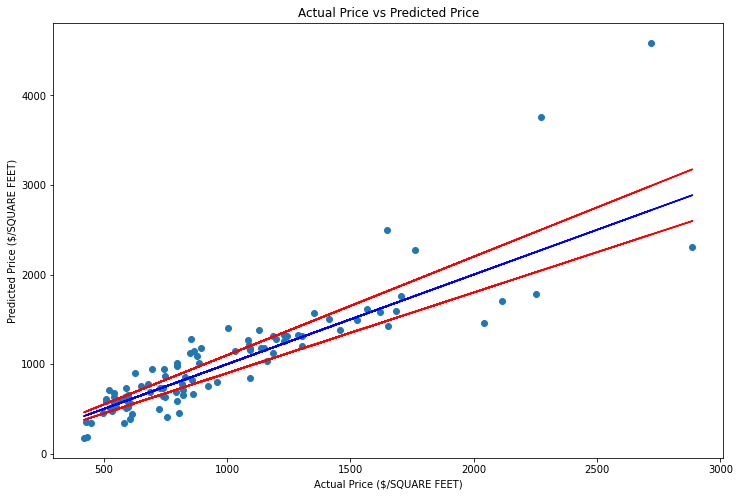

In [77]:
# Plot the predicted values vs the actual values
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price ($/SQUARE FEET)')
plt.ylabel('Predicted Price ($/SQUARE FEET)')
plt.title('Actual Price vs Predicted Price')
# plot the perfect prediction line
plt.plot(y_test, y_test, color='blue')
# plot the 10% error line
plt.plot(y_test, y_test*1.1, color='red')
# plot the -10% error line
plt.plot(y_test, y_test*0.9, color='red')

plt.show()


## 4.3) Mean Absolute Error (MAE) and Mean Squared Error (MSE)

In [78]:
# Calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mse = mean_squared_error(y_pred, y_test)
lin_msre = np.sqrt(lin_mse)
print("Linear Regression RMSE: %.4f" % lin_msre)
print("Linear Regression MAE: %.4f" % lin_mae)
print("Linear Regression MSE: %.4f" % lin_mse)

Linear Regression RMSE: 322.7017
Linear Regression MAE: 187.5809
Linear Regression MSE: 104136.3823


# 5) Model Prediction Test (User Input)

Selecting a random row from the testing set and predicting the price

In [79]:
# Test the model with a house from the dataset
# Choose between 0 and 289 (289 is the last row in the dataset of 290 rows)
house_Index = 123 # <----- Change this value to test a different house 
house = df_model.iloc[house_Index] 

# Predict the price of the house
predict = (lm.predict([house.drop('$/SQUARE FEET')])).round(2) # Predict the price of the house
print("Predicted Price", predict[0], "($/SQUARE FEET)") # Display the predicted price of the house
print("Actual Price:", house["$/SQUARE FEET"], "($/SQUARE FEET)") # Display the price of the house

# Display the difference between the predicted and actual price of the house
difference = (predict[0] - house["$/SQUARE FEET"]).round(2)
print("Difference:", difference, "($/SQUARE FEET)") 

# Display the percent difference between the predicted and actual price of the house
percent = ((difference / house["$/SQUARE FEET"]) * 100).round(2)
print("Percent Difference:", percent, "(%)") 

# Display the percent error between the predicted and actual price of the house
error = ((predict[0] - house["$/SQUARE FEET"])/predict[0]*100).round(2)
print("Percent Error:", error, "(%)") 

# Additional Information about the house
house

Predicted Price 687.68 ($/SQUARE FEET)
Actual Price: 686.0 ($/SQUARE FEET)
Difference: 1.68 ($/SQUARE FEET)
Percent Difference: 0.24 (%)
Percent Error: 0.24 (%)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PRICE                                      1925000.0
BEDS                                             4.0
BATHS                                            3.0
SQUARE FEET                                   2806.0
LOT SIZE                                      6199.0
YEAR BUILT                                    2018.0
DAYS ON MARKET                                  32.0
$/SQUARE FEET                                  686.0
HOA/MONTH                                      185.0
ZIP OR POSTAL CODE_91942                         0.0
ZIP OR POSTAL CODE_92037                         0.0
ZIP OR POSTAL CODE_92067                         0.0
ZIP OR POSTAL CODE_92122                         0.0
ZIP OR POSTAL CODE_92127                         1.0
LOCATION_91942 - La Mesa                         0.0
LOCATION_92037 - La Jolla                        0.0
LOCATION_92067 - Rancho Santa Fe                 0.0
LOCATION_92115 - San Diego                       0.0
LOCATION_92122 - University City              

# 6) Conclusion

Hypothesis Testing

<ol>
<li>H0: for Xi=92122 y>=828, H1: y< 828</li>
<li>H0: for Xi=92067 y>=840, H1: y< 840</li>
<li>H0: for Xi=92037 y>=889, H1: y< 889</li>
<li>H0: for Xi=91942 y>=485, H1: y< 485</li>
<li>H0: for Xi=92127 y>=579, H1: y< 579</li>
</ol>

# Extra

Test the same model with a new dataset

In [80]:
# Import the NEW complete redfin dataset
df_new = pd.io.parsers.read_csv("./redfin_2022-10-09-15-54-14-new-to-check-H0-regression.csv", dtype={'ZIP OR POSTAL CODE': 'str'})

# Prepare the NEW dataset with feature cleaning
# Drop the data columns that are not relevant and display the snapshot of the new dataframe
df_new_mod = df_new.drop(['SALE TYPE', 'CITY', 'STATUS', 'STATE OR PROVINCE', 'SOLD DATE', 'ADDRESS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'], axis=1)

# Fill NA values of "DAYS ON MARKET" with 0
df_new_mod["DAYS ON MARKET"].fillna(0, inplace = True)

# Drop Rows where "Property Type" is "Vacant Land"
vacant_land = df_new_mod[df_new_mod['PROPERTY TYPE'] == 'Vacant Land'].index
df_new_mod.drop(vacant_land, inplace = True)

# Fill NA values of "HOA" with "0"
df_new_mod["HOA/MONTH"].fillna(0, inplace=True)

# Fill NA "Lot Size" with Mean Value
df_new_mod["LOT SIZE"].fillna(df_new_mod['LOT SIZE'].mean(), inplace=True)

# Fill NA "Year Built" with Mean Value
df_new_mod["YEAR BUILT"].fillna(df_new_mod['YEAR BUILT'].mean(), inplace=True)

# Fill NA "BEDS" with Mean Value 
df_new_mod["BEDS"].fillna(df_new_mod['BEDS'].mean(), inplace=True)

# Fill NA "BATHS" with Mean Value
df_new_mod["BATHS"].fillna(df_new_mod['BATHS'].mean(), inplace=True)

# Adjust Dataframe for Linear Regression Analysis
df_new_model = pd.get_dummies(df_new_mod, columns=['ZIP OR POSTAL CODE']) # Convert categorical data to dummy variables
df_new_model = pd.get_dummies(df_new_model, columns=['LOCATION']) # Convert categorical data to dummy variables
df_new_model = pd.get_dummies(df_new_model, columns=['PROPERTY TYPE']) # Convert categorical data to dummy variables

# Prepare Data for Prediction
# Create X and y dataframes for the model
X_new=df_new_model.drop("$/SQUARE FEET", axis=1) # Drop the target variable from the dataframe
y_new=df_new_model["$/SQUARE FEET"] # Set the target variable as the y variable

# Split the data into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=1)

# Fit the model to the training data
lm.fit(X_new_train, y_new_train)

# Predict the values of the testing data
y_new_pred = lm.predict(X_new_test)

# New Model Scoring Metrics
model_new_score = lm.score(X_new_test, y_new_test).round(4)
print("New Dataset -> Model Score (R Squared): ", model_new_score)

# OLS of new model
X_new = sm.add_constant(X_new)
lin_new_model_results = OLS(y_new, X_new).fit()
lin_new_model_results.summary()

# Calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE)
lin_new_mae = mean_absolute_error(y_new_test, y_new_pred)
lin_new_mse = mean_squared_error(y_new_pred, y_new_test)
lin_new_msre = np.sqrt(lin_new_mse)
print("New Dataset -> Linear Regression RMSE: %.4f" % lin_new_msre)
print("New Dataset -> Linear Regression MAE: %.4f" % lin_new_mae)
print("New Dataset -> Linear Regression MSE: %.4f" % lin_new_mse)

# Test the model with a house from the dataset
# Choose between 0 and 289 (289 is the last row in the dataset of 290 rows)
house_new_Index = 123 # <----- Change this value to test a different house 
house_new = df_new_model.iloc[house_new_Index] 

# Predict the price of the house
predict_new = (lm.predict([house_new.drop('$/SQUARE FEET')])).round(2) # Predict the price of the house
print("New Dataset -> Predicted Price", predict_new[0], "($/SQUARE FEET)") # Display the predicted price of the house
print("New Dataset -> Actual Price:", house_new["$/SQUARE FEET"], "($/SQUARE FEET)") # Display the price of the house

# Display the difference between the predicted and actual price of the house
difference_new = (predict_new[0] - house_new["$/SQUARE FEET"]).round(2)
print("New Dataset -> Difference:", difference_new, "($/SQUARE FEET)") 

# Display the percent difference between the predicted and actual price of the house
percent_new = ((difference_new / house_new["$/SQUARE FEET"]) * 100).round(2)
print("New Dataset -> Percent Difference:", percent_new, "(%)") 

# Display the percent error between the predicted and actual price of the house
error_new = ((predict_new[0] - house_new["$/SQUARE FEET"])/predict_new[0]*100).round(2)
print("New Dataset -> Percent Error:", error, "(%)") 

# # Additional Information about the house
# house_new

New Dataset -> Model Score (R Squared):  0.7353
New Dataset -> Linear Regression RMSE: 181.5016
New Dataset -> Linear Regression MAE: 88.4579
New Dataset -> Linear Regression MSE: 32942.8347
New Dataset -> Predicted Price 846.32 ($/SQUARE FEET)
New Dataset -> Actual Price: 708.0 ($/SQUARE FEET)
New Dataset -> Difference: 138.32 ($/SQUARE FEET)
New Dataset -> Percent Difference: 19.54 (%)
New Dataset -> Percent Error: 0.24 (%)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [81]:
print("Model Score (R Squared): ", model_score, 'vs', model_new_score)
print("Linear Regression RMSE: %.4f" % lin_msre, 'vs', lin_new_msre.round(4))
print("Linear Regression MAE: %.4f" % lin_mae, 'vs', lin_new_mae.round(4))
print("Linear Regression MSE: %.4f" % lin_mse, 'vs', lin_new_mse.round(4))


Model Score (R Squared):  0.5815 vs 0.7353
Linear Regression RMSE: 322.7017 vs 181.5016
Linear Regression MAE: 187.5809 vs 88.4579
Linear Regression MSE: 104136.3823 vs 32942.8347
